In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar100.load_data()

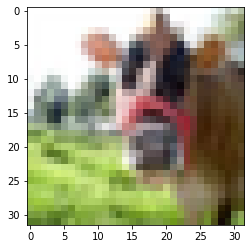

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)

In [8]:
X_train = (X_train-127.5).astype('float32')/127.5

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
BUFFER_SIZE = X_train.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(100)

In [11]:
train_dataset

<BatchDataset shapes: (None, 32, 32, 3), types: tf.float32>

In [12]:
def discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(8,(4,4), padding='SAME',input_shape=(32,32,3)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model    

In [13]:
model_discriminator = discriminator()

In [14]:
model_discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         392       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                409650    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 410,093
Trainable params: 410,093
Non-trainable params: 0
__________________________________________________

In [15]:
discriminator_optimizer = tf.optimizers.Adam(1e-3)

In [16]:
def discriminator_loss(real_prediction,fake_prediction):
    real_prediction = tf.sigmoid(real_prediction)
    fake_prediction = tf.sigmoid(fake_prediction)
    real_loss = tf.losses.binary_crossentropy(tf.ones_like(real_prediction),fake_prediction)
    fake_loss = tf.losses.binary_crossentropy(tf.zeros_like(fake_prediction),real_prediction)
    return fake_loss+real_loss

In [17]:
def generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8*8*100,input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Reshape((8,8,100)))
    model.add(tf.keras.layers.Conv2DTranspose(128,(5,5),padding='SAME'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='SAME'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(3,(5,5),strides=(2,2),padding='SAME',activation='tanh'))
    return model    

In [18]:
generator = generator_model()

In [19]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6400)              646400    
_________________________________________________________________
batch_normalization (BatchNo (None, 6400)              25600     
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 100)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         320128    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 64)        204864    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)       

In [45]:
generator(np.random.rand(100,100).astype('float32'))

<tf.Tensor: id=5788128, shape=(100, 32, 32, 3), dtype=float32, numpy=
array([[[[-0.00419757, -0.0024414 , -0.00123848],
         [ 0.0015212 ,  0.00253512,  0.00031941],
         [-0.0011243 ,  0.00625903, -0.00176755],
         ...,
         [ 0.00048609, -0.00624197,  0.00220137],
         [ 0.01832451, -0.00097696,  0.00162557],
         [-0.00286275, -0.01007047, -0.0034505 ]],

        [[-0.00308124, -0.00034027,  0.0071702 ],
         [ 0.00957087, -0.01555963, -0.00384447],
         [ 0.01006073, -0.01362689,  0.01953522],
         ...,
         [ 0.06224867,  0.00730413, -0.01098435],
         [-0.00965497,  0.00933715,  0.01183468],
         [ 0.01966871, -0.01263505,  0.01446437]],

        [[-0.01064298,  0.00765942, -0.01002097],
         [-0.02868141,  0.00324089, -0.00545851],
         [ 0.00047829, -0.00480925, -0.01345621],
         ...,
         [-0.01203205, -0.00179879,  0.00912585],
         [ 0.03139271, -0.0271159 ,  0.01962304],
         [-0.00738126,  0.01305761

In [46]:
def generator_loss(fake_prediction):
    fake_prediction = tf.sigmoid(fake_prediction)
    fake_loss = tf.losses.binary_crossentropy(tf.ones_like(fake_prediction),fake_prediction)
    return fake_loss

In [47]:
generator_optimizer = tf.optimizers.Adam(1e-3)

In [59]:
def train(data,epochs):
    for i in range(epochs):
        train_step(image)  
        

In [60]:
def train_step(image):
    for image in train_dataset:
        fake_image_noise =np.random.rand(100,100).astype('float32')
        with tf.GradientTape() as gen_tape,tf.GradientTape() as dis_tape:
            generator_images = generator(fake_image_noise)
            real_output = model_discriminator(image)
            fake_output = model_discriminator(generator_images)
            gen_loss = generator_loss(fake_output)
            dis_loss = discriminator_loss(real_output,fake_output)
            gradient_gen = gen_tape.gradient(gen_loss,generator.trainable_variables)
            gradient_dis = dis_tape.gradient(dis_loss,model_discriminator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradient_gen,generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradient_dis,model_discriminator.trainable_variables))
    print('generator loss:',np.mean(gen_loss))
    print('discriminator loss:', np.mean(dis_loss))

In [61]:
train(train_dataset,20)

generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0
generator loss: 0.0
discriminator loss: 0.0


In [26]:
fake_image_noise =np.random.rand(100,100).astype('float32')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


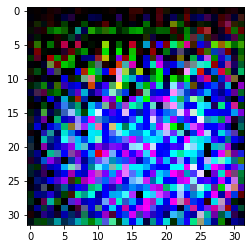

In [53]:
plt.imshow(tf.reshape(generator(np.random.rand(1,100)),(32,32,3)))

In [31]:
for i in range(1):
        for image in train_dataset:
            generator_images = generator(fake_image_noise)
            real_output = model_discriminator(image)
            fake_output = model_discriminator(generator_images)
            real_prediction = tf.sigmoid(real_output)
            fake_prediction = tf.sigmoid(fake_output)
            print(tf.ones_like(real_output),tf.ones_like(real_output).shape)
            print(tf.losses.binary_crossentropy(tf.ones_like(real_output),fake_output,from_logits=True))
            print(real_output.shape,fake_output.shape)


tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55140484e-27 9.31013486e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04465791e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84365079e-30 1.15606221e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53054721e-29 1.24759331e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58585225e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29102628e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80012844e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65029743e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86950623e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759800e-26 2.21388993e-28
 1.67163651e-27 8.04465791e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58582264e-28 2.23401208e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27768588e-26 4.80751054e-29
 6.29100240e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19548866e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13598390e-29
 1.39079230e-27 1.67053207e-29 2.28485607e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644548e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45758889e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29105016e-27 6.43139102e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80018822e-26 1.47708918e-27
 4.93573173e-29 1.48575655e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13596652e-29
 1.39079769e-27 1.67051913e-29 2.28486474e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55138722e-27 9.31006322e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759800e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93852480e-28 4.45755500e-26 8.88144905e-28
 1.05969490e-27 6.31527851e-30 1.27768588e-26 4.80754755e-29
 6.29105016e-27 6.43139102e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68542320e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47710044e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13598390e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66190522e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28620223e-30 4.86950623e-30 2.15558919e-27
 8.29438420e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45753805e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29102628e-27 6.43139102e-30 1.38680312e-27 2.27677088e-29
 2.61925664e-30 2.18071129e-31 1.63524889e-29 1.68543599e-26
 1.19548866e-29 4.18741707e-28 7.80015802e-26 1.47710044e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13596652e-29
 1.39079769e-27 1.67053207e-29 2.28483007e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29719762e-26 2.72867109e-30 6.94132982e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58583251e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769567e-26 4.80754755e-29
 6.29105016e-27 6.43139102e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68541658e-26
 1.19547949e-29 4.18741707e-28 7.80012844e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13598390e-29
 1.39079230e-27 1.67054471e-29 2.28484740e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769567e-26 4.80751054e-29
 6.29105016e-27 6.43134137e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542320e-26
 1.19547949e-29 4.18741707e-28 7.80009886e-26 1.47710044e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10134949e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28484740e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18932245e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28620223e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53054721e-29 1.24759331e-26 2.21390703e-28
 1.67163015e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29102628e-27 6.43134137e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542320e-26
 1.19547949e-29 4.18741707e-28 7.80012844e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28484740e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70311492e-30
 4.89313829e-29 2.65030763e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55139310e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86950623e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21390703e-28
 1.67163651e-27 8.04465791e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21388993e-28
 1.67163015e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58583251e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969490e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29105016e-27 6.43134137e-30 1.38680312e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47710044e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13597517e-29
 1.39079230e-27 1.67051913e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70311492e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 2.58582264e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29097852e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542320e-26
 1.19547949e-29 4.18738529e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86950623e-30 2.15558919e-27
 8.29435242e-28 1.53054721e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04465791e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58583251e-28 2.23399508e-29
 1.04432059e-28 1.93851734e-28 4.45758889e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27769567e-26 4.80751054e-29
 6.29097852e-27 6.43139102e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13598390e-29
 1.39079769e-27 1.67053207e-29 2.28483007e-27 9.76794503e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139310e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29722382e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86950623e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58584238e-28 2.23401208e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29102628e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542320e-26
 1.19547949e-29 4.18738529e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13598390e-29
 1.39079230e-27 1.67053207e-29 2.28485607e-27 9.76794503e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89317560e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29432160e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44053917e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29100240e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68544246e-26
 1.19548866e-29 4.18738529e-28 7.80012844e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28486474e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86950623e-30 2.15558919e-27
 8.29441597e-28 1.53054721e-29 1.24759800e-26 2.21388993e-28
 1.67163015e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47621959e-29 4.69616543e-28 

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29722382e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53054721e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29105016e-27 6.43134137e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542320e-26
 1.19548866e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44956218e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28484740e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70298176e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931336e-26
 1.09644964e-

tf.Tensor(
[1.55139310e-27 9.31013486e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53054721e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04465791e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93852480e-28 4.45758889e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29100240e-27 6.43139102e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80018822e-26 1.47708918e-27
 4.93573173e-29 1.48575655e-29 4.37510424e-28 5.40910214e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13598390e-29
 1.39079769e-27 1.67053207e-29 2.28483007e-27 9.76794503e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66190522e-26 1.18931790e-26
 1.09644964e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15606221e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29428982e-28 1.53054721e-29 1.24759800e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58585225e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88148275e-28
 1.05969894e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29102628e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28484740e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66190522e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.30999234e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53054721e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05970299e-27 6.31532591e-30 1.27769074e-26 4.80751054e-29
 6.29102628e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47709476e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28483874e-27 9.76779607e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644548e-

tf.Tensor(
[1.55140484e-27 9.31013486e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14205818e-29 5.28616198e-30 4.86950623e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04465791e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45753805e-26 8.88141535e-28
 1.05970703e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29100240e-27 6.43139102e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63526153e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80018822e-26 1.47710044e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40906077e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28485607e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66193480e-26 1.18931336e-26
 1.09645380e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163015e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58584238e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45758889e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29102628e-27 6.43139102e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18743296e-28 7.80018822e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73149468e-29 1.10136211e-27 1.44954008e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28484740e-27 9.76787055e-30
 7.32237824e-32 1.00278195e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958661e-26 2.29719762e-26 2.72867109e-30 6.94130333e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53053547e-29 1.24759331e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 2.58584238e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45757194e-26 8.88148275e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29105016e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542320e-26
 1.19547949e-29 4.18743296e-28 7.80015802e-26 1.47710044e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40910214e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13598390e-29
 1.39079230e-27 1.67053207e-29 2.28485607e-27 9.76779607e-30
 7.32237824e-32 1.00279724e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55139897e-27 9.31009866e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93852480e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31532591e-30 1.27769074e-26 4.80754755e-29
 6.29097852e-27 6.43139102e-30 1.38679783e-27 2.27677088e-29
 2.61927676e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13596652e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53054721e-29 1.24759331e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29097852e-27 6.43134137e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63526153e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48575655e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10136625e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67051913e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20876842e-29 8.70298176e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644548e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29428982e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04465791e-27 8.44047465e-28 1.28383929e-30
 3.47619341e-29 4.69614761e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45753805e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29097852e-27 6.43143992e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13598390e-29
 1.39079230e-27 1.67051913e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09645380e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29722382e-26 2.72867109e-30 6.94130333e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759800e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88141535e-28
 1.05969490e-27 6.31527851e-30 1.27769567e-26 4.80754755e-29
 6.29105016e-27 6.43134137e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68541658e-26
 1.19547949e-29 4.18743296e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48575655e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13598390e-29
 1.39079769e-27 1.67051913e-29 2.28485607e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29719762e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163015e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58583251e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45755500e-26 8.88141535e-28
 1.05970299e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29100240e-27 6.43143992e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68543599e-26
 1.19548866e-29 4.18741707e-28 7.80018822e-26 1.47709476e-27
 4.93569382e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94130333e-28
 1.14205818e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21388993e-28
 1.67163015e-27 8.04465791e-27 8.44050739e-28 1.28383929e-30
 3.47619341e-29 4.69616543e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769567e-26 4.80751054e-29
 6.29105016e-27 6.43134137e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18743296e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73149468e-29 1.10135373e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20886291e-29 8.70311492e-30
 4.89317560e-29 2.65031784e-27 7.66193480e-26 1.18932245e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58586236e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27768588e-26 4.80754755e-29
 6.29102628e-27 6.43143992e-30 1.38678723e-27 2.27677088e-29
 2.61927676e-30 2.18072798e-31 1.63524889e-29 1.68541658e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10134949e-27 1.44956218e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20886291e-29 8.70311492e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55139897e-27 9.31013486e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67162361e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04432059e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29097852e-27 6.43139102e-30 1.38680312e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80018822e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28485607e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65030763

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15606221e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53054721e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88141535e-28
 1.05969490e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29097852e-27 6.43139102e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80012844e-26 1.47710044e-27
 4.93573173e-29 1.48575655e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10136211e-27 1.44954008e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31009866e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28620223e-30 4.86950623e-30 2.15558919e-27
 8.29432160e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45752110e-26 8.88141535e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29102628e-27 6.43139102e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80009886e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66187625e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163015e-27 8.04468796e-27 8.44053917e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05970299e-27 6.31532591e-30 1.27769567e-26 4.80751054e-29
 6.29097852e-27 6.43134137e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68543599e-26
 1.19548866e-29 4.18743296e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13597517e-29
 1.39079769e-27 1.67051913e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958661e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58585225e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45757194e-26 8.88141535e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29097852e-27 6.43134137e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63526153e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73149468e-29 1.10135373e-27 1.44955117e-30 1.13598390e-29
 1.39079230e-27 1.67053207e-29 2.28483007e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66190522e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14205818e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21388993e-28
 1.67163015e-27 8.04471877e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 2.58583251e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29102628e-27 6.43134137e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19548866e-29 4.18741707e-28 7.80012844e-26 1.47708918e-27
 4.93573173e-29 1.48575655e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84365079e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53054721e-29 1.24759800e-26 2.21389860e-28
 1.67163015e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58584238e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45758889e-26 8.88148275e-28
 1.05970703e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29097852e-27 6.43139102e-30 1.38679253e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68541658e-26
 1.19547949e-29 4.18741707e-28 7.80018822e-26 1.47710044e-27
 4.93573173e-29 1.48575655e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13597517e-29
 1.39079769e-27 1.67053207e-29 2.28483007e-27 9.76794503e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66190522e-26 1.18931790e-26
 1.09644548e-

(100, 1) (100, 1)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29720640e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86950623e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28383929e-30
 3.47619341e-

 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958661e-26 2.29720640e-26 2.72867109e-30 6.94132982e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558091e-27
 8.29432160e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58583251e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05970703e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29100240e-27 6.43134137e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13597517e-29
 1.39079769e-27 1.67054471e-29 2.28485607e-27 9.76779607e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70311492e-30
 4.89313829e-29 2.65030763

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84365079e-30 1.15606221e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163015e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45758889e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27769567e-26 4.80754755e-29
 6.29102628e-27 6.43139102e-30 1.38678203e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67051913e-29 2.28483874e-27 9.76794503e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66193480e-26 1.18932245e-26
 1.09644132e-

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(100, 1), dtype=float32) (100, 1)
tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29432160e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21388993e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93852480e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29102628e-27 6.43139102e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13598390e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66190522e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31013486e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29438420e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44047465e-28 1.28382951e-30
 3.47619341e-29 4.69612932e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05970703e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29102628e-27 6.43143992e-30 1.38679783e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68541658e-26
 1.19547949e-29 4.18741707e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10136211e-27 1.44955117e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76779607e-30
 7.32237824e-32 1.00278965e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15606221e-30
 1.25958183e-26 2.29721503e-26 2.72869178e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163015e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58584238e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05970299e-27 6.31527851e-30 1.27769074e-26 4.80751054e-29
 6.29102628e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18074468e-31 1.63524889e-29 1.68543599e-26
 1.19547949e-29 4.18738529e-28 7.80015802e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44955117e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28483874e-27 9.76787055e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55140484e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25959139e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558091e-27
 8.29435242e-28 1.53053547e-29 1.24759800e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69616543e-28 2.58582264e-28 2.23399508e-29
 1.04432841e-28 1.93851734e-28 4.45757194e-26 8.88144905e-28
 1.05970703e-27 6.31527851e-30 1.27769567e-26 4.80754755e-29
 6.29105016e-27 6.43134137e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19548866e-29 4.18741707e-28 7.80012844e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37510424e-28 5.40910214e-31
 1.73148144e-29 1.10135787e-27 1.44954008e-30 1.13597517e-29
 1.39079230e-27 1.67053207e-29 2.28486474e-27 9.76794503e-30
 7.32237824e-32 1.00278965e-28 6.20876842e-29 8.70304871e-30
 4.89313829e-29 2.65030763e-27 7.66193480e-26 1.18931790e-26
 1.09644964e-

tf.Tensor(
[1.55139897e-27 9.31013486e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29721503e-26 2.72867109e-30 6.94127685e-28
 1.14206683e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29432160e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58584238e-28 2.23399508e-29
 1.04433635e-28 1.93851734e-28 4.45755500e-26 8.88144905e-28
 1.05970703e-27 6.31527851e-30 1.27770044e-26 4.80754755e-29
 6.29102628e-27 6.43139102e-30 1.38680312e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68541658e-26
 1.19548866e-29 4.18741707e-28 7.80012844e-26 1.47708918e-27
 4.93573173e-29 1.48575655e-29 4.37512061e-28 5.40914305e-31
 1.73148144e-29 1.10135373e-27 1.44955117e-30 1.13597517e-29
 1.39080299e-27 1.67051913e-29 2.28483007e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20881536e-29 8.70304871e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18931790e-26
 1.09644132e-

tf.Tensor(
[1.55139897e-27 9.31006322e-27 1.84366471e-30 1.15607095e-30
 1.25958183e-26 2.29719762e-26 2.72867109e-30 6.94127685e-28
 1.14205818e-29 5.28616198e-30 4.86954309e-30 2.15558919e-27
 8.29435242e-28 1.53053547e-29 1.24759331e-26 2.21389860e-28
 1.67163651e-27 8.04468796e-27 8.44050739e-28 1.28382951e-30
 3.47619341e-29 4.69614761e-28 2.58582264e-28 2.23399508e-29
 1.04433635e-28 1.93852480e-28 4.45755500e-26 8.88144905e-28
 1.05969894e-27 6.31527851e-30 1.27769074e-26 4.80754755e-29
 6.29100240e-27 6.43139102e-30 1.38678723e-27 2.27677088e-29
 2.61925664e-30 2.18072798e-31 1.63524889e-29 1.68542952e-26
 1.19548866e-29 4.18741707e-28 7.80018822e-26 1.47708918e-27
 4.93573173e-29 1.48574526e-29 4.37512061e-28 5.40910214e-31
 1.73148144e-29 1.10135373e-27 1.44954008e-30 1.13598390e-29
 1.39079230e-27 1.67051913e-29 2.28485607e-27 9.76787055e-30
 7.32237824e-32 1.00279724e-28 6.20881536e-29 8.70298176e-30
 4.89313829e-29 2.65031784e-27 7.66193480e-26 1.18932245e-26
 1.09644548e-

KeyboardInterrupt: 

In [29]:
tf.losses.binary_crossentropy(tf.ones_like(real_prediction),fake_prediction)

<tf.Tensor: id=5699450, shape=(100,), dtype=float32, numpy=
array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0.], dtype=float32)>

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_discriminator, show_shapes = True, show_layer_names = True).create(prog = 'dot', format = 'svg'))

Using TensorFlow backend.


ImportError: cannot import name 'path_to_string' from 'tensorflow.python.keras.utils.io_utils' (C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\keras\utils\io_utils.py)

In [23]:
tf.keras.utils.model_to_dot(
    model_discriminator, show_shapes=False, show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=96, subgraph=False
)

"dot" with args ['-Tps', 'C:\\Users\\Khushee\\AppData\\Local\\Temp\\tmpl7hmz6m0'] returned code: 1

stdout, stderr:
 b"%!PS-Adobe-3.0\r\n%%Creator: graphviz version 2.38.0 (20140413.2041)\r\n%%Title: G\r\n%%Pages: (atend)\r\n%%BoundingBox: (atend)\r\n%%EndComments\r\nsave\r\n%%BeginProlog\r\n/DotDict 200 dict def\r\nDotDict begin\r\n\r\n/setupLatin1 {\r\nmark\r\n/EncodingVector 256 array def\r\n EncodingVector 0\r\n\r\nISOLatin1Encoding 0 255 getinterval putinterval\r\nEncodingVector 45 /hyphen put\r\n\r\n% Set up ISO Latin 1 character encoding\r\n/starnetISO {\r\n        dup dup findfont dup length dict begin\r\n        { 1 index /FID ne { def }{ pop pop } ifelse\r\n        } forall\r\n        /Encoding EncodingVector def\r\n        currentdict end definefont\r\n} def\r\n/Times-Roman starnetISO def\r\n/Times-Italic starnetISO def\r\n/Times-Bold starnetISO def\r\n/Times-BoldItalic starnetISO def\r\n/Helvetica starnetISO def\r\n/Helvetica-Oblique starnetISO def\r\n/Helvetica-Bold starne

AssertionError: 1

In [23]:
tf.keras.utils.plot_model(model_discriminator, to_file='model_combined.png')


"dot" with args ['-Tps', 'C:\\Users\\Khushee\\AppData\\Local\\Temp\\tmptqyq5ake'] returned code: 1

stdout, stderr:
 b"%!PS-Adobe-3.0\r\n%%Creator: graphviz version 2.38.0 (20140413.2041)\r\n%%Title: G\r\n%%Pages: (atend)\r\n%%BoundingBox: (atend)\r\n%%EndComments\r\nsave\r\n%%BeginProlog\r\n/DotDict 200 dict def\r\nDotDict begin\r\n\r\n/setupLatin1 {\r\nmark\r\n/EncodingVector 256 array def\r\n EncodingVector 0\r\n\r\nISOLatin1Encoding 0 255 getinterval putinterval\r\nEncodingVector 45 /hyphen put\r\n\r\n% Set up ISO Latin 1 character encoding\r\n/starnetISO {\r\n        dup dup findfont dup length dict begin\r\n        { 1 index /FID ne { def }{ pop pop } ifelse\r\n        } forall\r\n        /Encoding EncodingVector def\r\n        currentdict end definefont\r\n} def\r\n/Times-Roman starnetISO def\r\n/Times-Italic starnetISO def\r\n/Times-Bold starnetISO def\r\n/Times-BoldItalic starnetISO def\r\n/Helvetica starnetISO def\r\n/Helvetica-Oblique starnetISO def\r\n/Helvetica-Bold starne

AssertionError: 1